In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn import datasets
from sklearn import model_selection
import numpy as np
import matplotlib as mp
import jupyter
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
mem = Memory("./mycache")

@mem.cache
def get_data(mysvmlightfile):
    data = load_svmlight_file(mysvmlightfile)
    return data[0], data[1]

In [3]:
#定义logistic function
def Logistic(a):
    return 1/(1+pow(np.e,-a))

In [4]:
#读取数据集
x_train,y_train=get_data('a9a.txt')
x_test,y_test=get_data('a9a.t')

y_train=np.mat(y_train).T
y_test=np.mat(y_test).T

________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.txt')
_________________________________________________________get_data - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-Desktop-机器学习实验课-ML2017-lab-01-master-ML2017-lab-02-master-__ipython-input__.get_data...
get_data('a9a.t')
_________________________________________________________get_data - 0.1s, 0.0min


In [5]:
#增加输入x矩阵一列全为1是的线性模型满足y=w*x

x_train=x_train.todense()
one=np.ones(x_train.shape[0])
x_train=np.column_stack((x_train,one))
x_test=x_test.todense()

#测试集x值补全一列全为0
zero=np.zeros(x_test.shape[0])
x_test=np.column_stack((x_test,zero))

one=np.ones(x_test.shape[0])
x_test=np.column_stack((x_test,one))

In [6]:
#参数随机初始化
w=np.random.random(size=(1,x_train.shape[1]))
print(w)
w=np.mat(w)
w=w.T

[[ 0.51353039  0.49472568  0.56808489  0.19807431  0.81348955  0.53003731
   0.44757311  0.11904095  0.866725    0.56029986  0.14275245  0.98789259
   0.4880478   0.80894913  0.09122175  0.59220612  0.08533515  0.68927637
   0.05083508  0.81348751  0.7375415   0.16049246  0.63514404  0.58895768
   0.33168498  0.28422429  0.71478937  0.44193875  0.02641069  0.66607201
   0.10990959  0.14023166  0.49988058  0.02074525  0.03978508  0.45351373
   0.61213521  0.35163003  0.94257791  0.88773423  0.44387155  0.71009306
   0.31554858  0.06348635  0.26779429  0.303954    0.13721965  0.48959345
   0.57339853  0.05736219  0.71495193  0.12979542  0.66407843  0.19331512
   0.6884582   0.51611364  0.96738918  0.95042099  0.83053584  0.38305508
   0.22669167  0.28405493  0.13151552  0.7261459   0.85477115  0.27816187
   0.56044702  0.60675665  0.69455779  0.71108874  0.14336211  0.1036574
   0.62111971  0.1710555   0.87737203  0.80952172  0.92784773  0.22345606
   0.72024112  0.45311163  0.90427652  

In [7]:
#sgd
sgd_rate=0.01
sgd_w=w

#momentum
momentum_gamma=0.9
momentum_rate=0.01
momentum_v = 0
momentum_w=w

#NAG
nag_gamma=0.9
nag_rate=0.1
nag_v=0
nag_w=w

#adagrad
adagrad_rate=0.01
adagrad_G=0
adagrad_epsilon=math.pow(np.e,-6)
adagrad_w=w

#rmsprop
rmsprop_rate=0.05
rmsprop_G=0
rmsprop_epsilon=math.pow(np.e,-6)
rmsprop_gamma=0.9
rmsprop_w=w

#adadelta
adadelta_G=0
adadelta_epsilon=math.pow(np.e,-6)
adadelta_gamma=0.5
adadelta_t=0
adadelta_w=w

#adam
adam_G=0
adam_epsilon=math.pow(np.e,-6)
adam_gamma=0.99
adam_t=0
adam_m=0
adam_beta=0.9
adam_w=w

In [8]:
#循环次数
time=0

#画图存数据的列表
time_list=[]
sgd_L_list=[]
momentum_L_list=[]
nag_L_list=[]
adagrad_L_list=[]
rmsprop_L_list=[]
adadelta_L_list=[]
adam_L_list=[]

loss function：jw=log(1+e**(-yi*w.T*xi))+0.5*w.T*w，grad_w= w-（yi*xi）/(1+e**(-yi*w.T*xi))

In [9]:
while time<20:
    time=time+1

    #随机取十个样本计算梯度
    Jgrad = 0
    for i in random.sample(range(x_train.shape[0]),10):
        Jgrad=Jgrad-(y_train[i]*x_train[i]).T/(1+pow(np.e,(np.array(y_train[i]*x_train[i]*w)[0][0])))
    Jgrad=Jgrad/10
    
    #sgd
    sgd_w=(1-sgd_rate)*sgd_w-sgd_rate*Jgrad
    sgd_L = 0
    for i in range(x_test.shape[0]):
        sgd_L = sgd_L+math.log(1/Logistic(np.array(y_test[i]*x_test[i]*sgd_w)[0][0]))
    sgd_L=sgd_L/x_test.shape[0]+0.5*sgd_w.T*sgd_w
    print("epoch:", time)
    print("sgd_test_loss:", sgd_L)
    time_list.append(time)
    sgd_L_list.append(np.array(sgd_L)[0][0])

    #momentum
    momentum_v = momentum_gamma * momentum_v + momentum_rate * Jgrad
    momentum_w = momentum_w - momentum_v
    momentum_L = 0
    for i in range(x_test.shape[0]):
        momentum_L = momentum_L + math.log(1 / Logistic(np.array(y_test[i] * x_test[i] * momentum_w)[0][0]))
    momentum_L = momentum_L / x_test.shape[0]+0.5*momentum_w.T*momentum_w
    print("momentum_test_loss:", momentum_L)
    momentum_L_list.append(np.array(momentum_L)[0][0])

    #nag
    nag_v = 0
    nag__Jgrad=0
    for i in random.sample(range(x_train.shape[0]), 10):
        nag__Jgrad = nag__Jgrad-(y_train[i] * x_train[i]).T / (1 + pow(np.e, (np.array(y_train[i] * x_train[i] * (w - nag_gamma * nag_v))[0][0])))
    nag__Jgrad=nag__Jgrad/10
    nag_v = nag_gamma * nag_v + nag_rate * nag__Jgrad
    nag_w = nag_w - nag_v
    nag_L = 0
    for i in range(x_test.shape[0]):
        nag_L = nag_L + math.log(1 / Logistic(np.array(y_test[i] * x_test[i] * nag_w)[0][0]))
    nag_L = nag_L / x_test.shape[0]+0.5*nag_w.T*nag_w
    print("nag_test_loss:", nag_L)
    nag_L_list.append(np.array(nag_L)[0][0])

    #adagrad
    adagrad_Jgrad=Jgrad/10
    adagrad_G = adagrad_G + np.array(adagrad_Jgrad) * np.array(adagrad_Jgrad)
    adagrad_w = adagrad_w - (adagrad_rate / np.sqrt(adagrad_epsilon + adagrad_G)) * np.array(Jgrad)
    adagrad_L = 0
    for i in range(x_test.shape[0]):
        adagrad_L = adagrad_L + math.log(1 / Logistic(np.array(y_test[i] * x_test[i] * adagrad_w)[0][0]))
    adagrad_L = adagrad_L / x_test.shape[0]+0.5*adagrad_w.T*adagrad_w
    print("adagrad_test_loss:", adagrad_L)
    adagrad_L_list.append(np.array(adagrad_L)[0][0])

    #rmsprop
    rmsprop_G = rmsprop_gamma*rmsprop_G +(1-rmsprop_gamma)*np.array(Jgrad) * np.array(Jgrad)
    rmsprop_w = rmsprop_w - (rmsprop_rate / np.sqrt(rmsprop_epsilon + rmsprop_G)) * np.array(Jgrad)
    rmsprop_L = 0
    for i in range(x_test.shape[0]):
        rmsprop_L = rmsprop_L + math.log(1 / Logistic(np.array(y_test[i] * x_test[i] * rmsprop_w)[0][0]))
    rmsprop_L =rmsprop_L / x_test.shape[0]+0.5*rmsprop_w.T*rmsprop_w
    print("rmsprop_test_loss:",rmsprop_L)
    rmsprop_L_list.append(np.array(rmsprop_L)[0][0])

    #adadelta
    adadelta_G = adadelta_gamma * adadelta_G + (1 - adadelta_gamma) * np.array(Jgrad) * np.array(Jgrad)
    adadelta_delta_w=-np.sqrt(adadelta_t+adadelta_epsilon)/np.sqrt(adadelta_G+adadelta_epsilon) * np.array(Jgrad)
    adadelta_w = adadelta_w + adadelta_delta_w
    adadelta_t=adadelta_gamma*adadelta_t+(1-adadelta_gamma)*np.array(adadelta_delta_w)*np.array(adadelta_delta_w)
    adadelta_L = 0
    for i in range(x_test.shape[0]):
        adadelta_L = adadelta_L + math.log(1 / Logistic(np.array(y_test[i] * x_test[i] * adadelta_w)[0][0]))
    adadelta_L = adadelta_L / x_test.shape[0]+0.5*adadelta_w.T*adadelta_w
    print("adadelta_test_loss:", adadelta_L)
    adadelta_L_list.append(np.array(adadelta_L)[0][0])

    #adam
    adam_m=adam_beta*adam_m+(1-adam_beta)*Jgrad
    adam_G = adam_gamma * adam_G + (1 - adam_gamma) * np.array(Jgrad) * np.array(Jgrad)
    adam_alpha=adam_rate*math.sqrt(1-math.pow(adam_gamma,time))/(1-math.pow(adam_beta,time))
    adam_w = adam_w - adam_alpha*adam_m/np.sqrt(adam_G+adam_epsilon)
    adam_L = 0
    for i in range(x_test.shape[0]):
        adam_L = adam_L + math.log(1 / Logistic(np.array(y_test[i] * x_test[i] * adam_w)[0][0]))
    adam_L = adam_L / x_test.shape[0]+0.5*adam_w.T*adam_w
    print("adam_test_loss:", adam_L)
    adam_L_list.append(np.array(adam_L)[0][0])


epoch: 1
sgd_test_loss: [[ 23.45170964]]
momentum_test_loss: [[ 23.8736414]]
nag_test_loss: [[ 22.98747508]]
adagrad_test_loss: [[ 22.38496797]]
rmsprop_test_loss: [[ 19.88580275]]
adadelta_test_loss: [[ 21.66636997]]
adam_test_loss: [[ 22.38496797]]
epoch: 2
sgd_test_loss: [[ 22.95034381]]
momentum_test_loss: [[ 23.68172601]]
nag_test_loss: [[ 22.05872414]]
adagrad_test_loss: [[ 21.3837801]]
rmsprop_test_loss: [[ 17.86063858]]
adadelta_test_loss: [[ 19.99545491]]
adam_test_loss: [[ 20.7536885]]
epoch: 3
sgd_test_loss: [[ 22.44563218]]
momentum_test_loss: [[ 23.40919438]]
nag_test_loss: [[ 21.16450238]]
adagrad_test_loss: [[ 20.3844539]]
rmsprop_test_loss: [[ 16.00128248]]
adadelta_test_loss: [[ 18.13850571]]
adam_test_loss: [[ 19.10277821]]
epoch: 4
sgd_test_loss: [[ 21.92680008]]
momentum_test_loss: [[ 23.04301304]]
nag_test_loss: [[ 20.47395353]]
adagrad_test_loss: [[ 19.33981466]]
rmsprop_test_loss: [[ 14.44643754]]
adadelta_test_loss: [[ 16.31594227]]
adam_test_loss: [[ 17.4668433

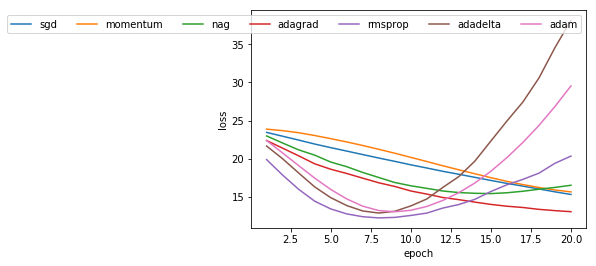

In [10]:
#画图
plt.xlabel('epoch')
plt.ylabel('loss')
line1=plt.plot(time_list,sgd_L_list)
line2=plt.plot(time_list,momentum_L_list)
line3=plt.plot(time_list,nag_L_list)
line4=plt.plot(time_list,adagrad_L_list)
line5=plt.plot(time_list,rmsprop_L_list)
line6=plt.plot(time_list,adadelta_L_list)
line7=plt.plot(time_list,adam_L_list)
label = ["sgd","momentum","nag","adagrad","rmsprop","adadelta","adam"]
plt.legend(label, loc = 0, ncol = 7)
plt.show()